Make sure to install and then import all the required python packages before beginning

In [17]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.special import comb
import statsmodels.api as sm

# Problem #1:
[30 in Total] Practice Goal: OLS estimation/Cross validation/ MLE estimation for linear model

### Problem #1 - (1)	
Use observation ID 1-400 (you will use the last 100 data points as holdout sample for cross-validation) to estimate this model using Ordinary Least Square (OLS) method and report the coefficients and standard errors of the coefficients.  [8]

In [14]:
#bring in the data into python dataframe
df = pd.read_excel('C:/Users/MarvinEspinoza-Leiva/github-repo-folder/adv_bus_analytics/homework_1/hw1_housing_data-1.xlsx')
df.head()

,ID,CRIM,CHAS,NOX,RM,AGE,DIS,PTRATIO,MEDV
0,1,7.52601,0,0.713,6.417,98.3,2.1850,20.2,13.00
1,2,1.51902,1,0.605,8.375,93.9,2.1620,14.7,50.00
2,3,0.28392,0,0.493,5.708,74.3,4.7211,19.6,18.50
3,4,0.11460,0,0.464,6.538,58.7,3.9175,18.6,24.40
4,5,8.79212,0,0.584,5.565,70.6,2.0635,20.2,17.16


In [19]:
#filter data to only use ID 1-400
filtered_df = df[df['ID'] <= 400]

#Using OLS linear regression, estimate the following model:  MEDV = constant + CRIM + CHAS + NOX + RM + AGE + DIS + PTRATIO
X = filtered_df[['CRIM', 'CHAS', 'NOX', 'RM','AGE','DIS','PTRATIO']]  # Independent variables
y = filtered_df['MEDV']  # Dependent variable

# Add constant (intercept)
X = sm.add_constant(X)

# Create and fit model
model = sm.OLS(y, X).fit()

#produce the coefficients
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     116.4
Date:                Sat, 02 Nov 2024   Prob (F-statistic):           1.26e-91
Time:                        13:39:00   Log-Likelihood:                -1226.6
No. Observations:                 400   AIC:                             2469.
Df Residuals:                     392   BIC:                             2501.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.3583      5.265      4.057      0.000      11.008      31.709
CRIM          -0.1214      0.037     -3.259      0.001      -0.195      -0.048
CHAS           3.0206      1.074      2.811      0.005       0.908       5.133
NOX          -23.2308      3.956     -5.872      0.000     -31.009     -15.453
RM             6.8058      0.411     16.540      0.000       5.997       7.615
AGE           -0.0501      0.015     -3.321      0.001      -0.080      -0.020
DIS           -1.2356      0.215     -5.739      0.000      -1.659      -0.812
PTRATIO       -1.1073      0.138     -8.013      0.000      -1.379      -0.836
==============================================================================
Omnibus:                      157.355   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              943.192
Skew:                           1.559   Prob(JB):                    1.54e-205
Kurtosis:                       9.846   Cond. No.                     1.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Problem #1 - (2):

The interpretrations of B0, B1, and B2 are the following:

B0 (constant) = The expected median value of homes in Boston when all other variables in the model equal 0 is $21,358.3

B1 (CRIM) = For every 1 unit increase in the per capita crime rate, there is an expected decrease in median home values by $121.40, holding all other variables constant.

B2 (CHAS) = Houses in census tracts that bound the Charles River have an expected median value $3,020.60 higher than houses in tracts that do not bound the river, holding all other variables constant.

### Problem #1 - (3)
(3)	Predict the values for the last 100 data points using the model you estimated in the last part.  Plot the actual values versus predicted values.  Comment on how well the model does for out of sample prediction [5]

Text(0.5, 1.0, 'Actual vs Predicted Home Values')

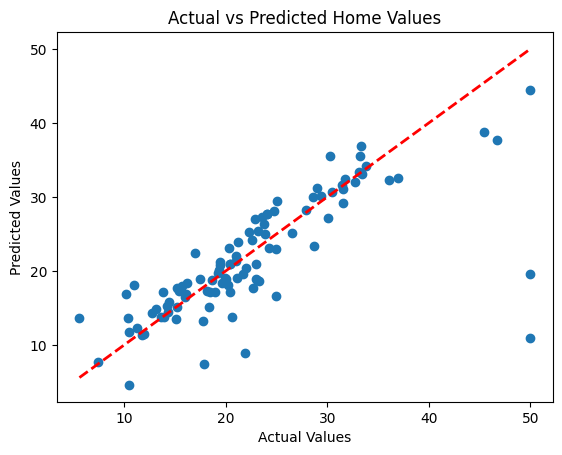

In [ ]:
# Get the data points 401-500
test_data = df[df['ID'] > 400]

# Prepare test data (same variables as training)
X_test = test_data[['CRIM', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO']]
X_test = sm.add_constant(X_test)  # Add constant
y_test = test_data['MEDV']  # Actual values

# Make predictions
predictions = model.predict(X_test)

# Create scatter plot
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # 45-degree line

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Home Values')

Commentary on how well the model does for out of sample prediction:

The model seems to perform quite well when predicting values for an out-of-sample testing set of data, until the model attempts to predict values around 50 for the MEDV.
But this makes sense because OLS regression models become less reliable at the tail ends of distirbutions where there may be few data points.  Also, this model performs better in the middle range: Predictions between 15-35 show tighter clustering of data points around the 45 degree line (which represents perfect prediction).

### Problem 1 - (4):

Estimate the model using Maximum Likelihood Estimation method (MLE) using observation ID 1-400 and report the coefficients. When using the minimize() function, choose method to be SLSQP. Comment on how close the coefficients are from OLS and MLE methods [11]

In [ ]:
from scipy.stats import norm
from scipy.optimize import minimize
import numpy as np

# Using the same filtered data from before (ID 1-400)
filtered_df = df[df['ID'] <= 400]

# Define Log Likelihood function for multiple regression
def MLE_Norm(parameters):
    # Extract parameters
    # First parameter is constant, last is std_dev, middle ones are coefficients
    const = parameters[0]
    betas = parameters[1:-1]  # All coefficients except constant and std_dev
    std_dev = parameters[-1]

    # Get X variables (without constant)
    X = filtered_df[['CRIM', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO']].values

    # Calculate predicted values
    pred = const + np.sum(X * betas, axis=1)

    # Calculate log likelihood
    LL = norm.logpdf(filtered_df['MEDV'], pred, std_dev).sum()
    return -LL  # Minimize negative log likelihood

# Initial parameter guesses (using OLS results as starting point)
initial_params = np.concatenate([
									[model.params['const']],  # Constant
									[model.params['CRIM'],
          								model.params['CHAS'],
                                        model.params['NOX'],
										model.params['RM'],
                                        model.params['AGE'],
                                        model.params['DIS'],
										model.params['PTRATIO']],  # Coefficients
									[np.std(filtered_df['MEDV'])]  # Initial guess for std_dev
								])

# Minimize negative log likelihood
result = minimize(MLE_Norm, initial_params, method='SLSQP')

# Print results and compare with OLS
print("MLE Coefficients:")
print("Constant:", result.x[0])
print("CRIM:", result.x[1])
print("CHAS:", result.x[2])
print("NOX:", result.x[3])
print("RM:", result.x[4])
print("AGE:", result.x[5])
print("DIS:", result.x[6])
print("PTRATIO:", result.x[7])
print("\nStandard Deviation:", result.x[8])

# Compare with OLS
print("\nComparison with OLS coefficients:")
variables = ['const', 'CRIM', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO']
for i, var in enumerate(variables):
    print(f"{var}:")
    print(f"OLS: {model.params[var]:.4f}")
    print(f"MLE: {result.x[i]:.4f}")
    print(f"Difference: {abs(model.params[var] - result.x[i]):.4f}\n")

MLE Coefficients:
Constant: 21.35833499898478
CRIM: -0.12143866178295948
CHAS: 3.020648711184922
NOX: -23.230775693818874
RM: 6.805782850899507
AGE: -0.050103863496450886
DIS: -1.2356325499559955
PTRATIO: -1.1072594951628139

Standard Deviation: 5.1936658517297865

Comparison with OLS coefficients:
const:
OLS: 21.3583
MLE: 21.3583
Difference: 0.0000

CRIM:
OLS: -0.1214
MLE: -0.1214
Difference: 0.0000

CHAS:
OLS: 3.0206
MLE: 3.0206
Difference: 0.0000

NOX:
OLS: -23.2308
MLE: -23.2308
Difference: 0.0000

RM:
OLS: 6.8058
MLE: 6.8058
Difference: 0.0000

AGE:
OLS: -0.0501
MLE: -0.0501
Difference: 0.0000

DIS:
OLS: -1.2356
MLE: -1.2356
Difference: 0.0000

PTRATIO:
OLS: -1.1073
MLE: -1.1073
Difference: 0.0000



Commentary on how close the coefficient are from OLS and MLE methods:

Well, I started the estimation using the OLS estimates because I figured they would probably be the same or if there were differences, then I'd be ablet o see them from the MLE estimation.  But in this case, they are exactly the same.  I also started with the OLS estimates because I wasn't sure what other values to try out, and I got a little confused about what values to start with because I wasn't sure what the relationships could be between the Y variable and the X variables.

# Problem 2
[15 in Total] Practice Goal: Law of total probability/Bayes theorem/Consumer heterogeneity

### Problem 2 - (1):
During lunch/dinner time, is it more likely to observe t=0.5 or t=2.1 ? Show your derivation clearly. [5]

**Derivation below:**

We are looking to determine which is greater, during lunch/dinner time:
1. P(t=0.5 | lam = 1) 
2. P(t=2.1 | lam = 1)

We know that:
- P(t | lam) = lam * e ^ -(lam * t)

Therefore:
P(t | lam = 1) = 1 * e ^ -(1 * t)

Which means:
1. P(t=0.5 | lam = 1) = 1 * e ^ -(1 * 0.5) = 0.60653
2. P(t=2.1 | lam = 1) = 1 * e ^ -(1 * 2.1) = 0.12246

So we know then that:
P(t=0.5 | lam = 1) > P(t=2.1 | lam = 1) which makes sense because during lunch and dinner, more than likely more people will be lining up in the car line.  So, there is a higher likelihood that you have shorter amounts of time between when one driver pulls into the drive through and the next driver.

P(t=0.5 | lam = 1) =  60.653065971263345
P(t=2.1 | lam = 1) =  12.245642825298193


Text(0, 0.5, 'Probability density')

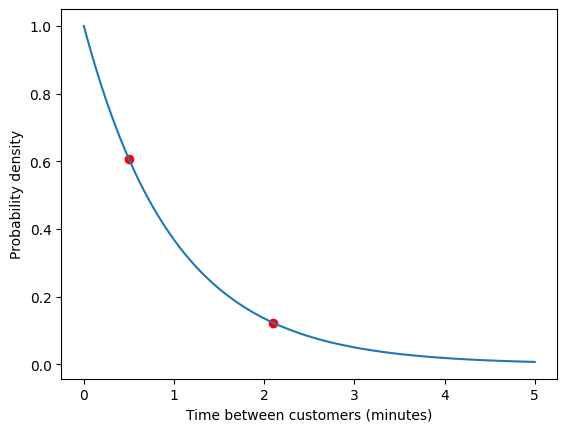

In [52]:
import math as m

#here are the two probability functions for 1 and 2 in the derivation above.
# x = P(t=0.5 | lam = 1)
# y = P(t=2.1 | lam = 1)

x = 1 * m.e ** -(1 * 0.5)
y = 1 * m.e ** -(1 * 2.1)

print("P(t=0.5 | lam = 1) = ",x*100)
print("P(t=2.1 | lam = 1) = ",y*100)

#plot the probabilities on the exponential distribution
t = np.linspace(0, 5, 100)
pdf = 1 * np.exp(-1 * t)

plt.plot(t, pdf)
plt.scatter([0.5, 2.1], [0.60653, 0.12246], color='red')
plt.xlabel('Time between customers (minutes)')
plt.ylabel('Probability density')


### Problem 2 - (2):
Without knowing whether it is lunch/dinner time or not, is it more likely to observe t=0.5 or t=2.1? Show your derivation clearly.  [5]

First, I need to calculate P(t=0.5):

P(t=0.5) = P(t=0.5 | lam = 1) * P(lam = 1) + P(t=0.5 | lam = 0.2) * P(lam = 0.2)
		 = (0.6065) * (0.4) + (0.181) * (0.6)
		 = 0.2426 + 0.1086
		 = 0.3512

Second, I need to calculate P(t=2.1):

P(t=2.1) = P(t=2.1 | lam = 1) * P(lam = 1) + P(t=2.1 | lam = 0.2) * P(lam = 0.2)
		 = (0.1225) * (0.4) + (0.1314) * (0.6)
		 = 0.12784

So:
 - P(t=0.5) = 0.3512
 - P(t=2.1) = 0.1278

Therefore, it is more likely that we observe t=0.5, which makes sense given that:

1. During lunch/dinner (λ=1), shorter times are more likely
2. During other times (λ=0.2), the probability distribution is more spread out
3. The weighted average of these two scenarios still favors the shorter time


In [78]:
#I used the following function to determine my calculations:

def exp_prob(lam, time):

	#declare the values
	lam = lam
	t = time

	#exponential function
	prob = lam * np.exp(-lam * t)
	return round(prob,4)

#vary these values as needed:
l = 1
t = 2.1
print(exp_prob(lam = l, time = t))

0.1225


### Problem 2 - (3):

The number of minutes between two drive-through customers is 2.1, what is the probability of this happened in the lunch/dinner time? Show your derivation clearly. [5]

We need to find: P(lam = 1 | t=2.1)

The expression we have to solve for is:
P(lam = 1 | t = 2.1)  =  [P(t = 2.1 | lam = 1) * P(lam = 1)] / P(t = 2.1)


And we know:
- P(t = 2.1) = 0.1278
- P(t = 2.1 | lam = 1) = 0.1225
- P(lam = 1) = 0.4


So we plug these values we've already calculated before:
P(lam = 1 | t = 2.1)  =  [P(t = 2.1 | lam = 1) * P(lam = 1)] / P(t = 2.1)
					  = [0.1225 * 0.4] / 0.1278
					  = 0.3834

Therefore, the probabliy of seeing 2.1 minutes between two drive through customers and that occurrence came during the lunch/dinner time is 38.34%:
- P(lam = 1 | t = 2.1)  = 0.3834


In [79]:
(0.1225 * 0.4) / 0.1278

0.3834115805946792